In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests 
from urllib.parse import urlencode 

# Предварительный этап. Считывание данных

Cчитывание файла assessments.csv с Яндекс Диск:

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ' 
 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
download_response = requests.get(download_url) 
df_assessments = pd.read_csv(download_url, sep=',') 
df_assessments.head(5)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


Cчитывание файла courses.csv с Яндекс Диск:

In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/jmJxR8yhwCXlaw' 
 

final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 

download_response = requests.get(download_url) 
df_courses = pd.read_csv(download_url, sep=',')
df_courses.head(5)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


Cчитывание файла studentAssessment.csv с Яндекс Диск:

In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/DYd4M5b_8RETsA' 
 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
download_response = requests.get(download_url) 
df_studentAssessment = pd.read_csv(download_url, sep=',') 
df_studentAssessment.head(5)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


Cчитывание файла studentRegistration.csv с Яндекс Диск:

In [5]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/lqHnH8NOZ458iw' 
 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 


download_response = requests.get(download_url) 
df_studentRegistration = pd.read_csv(download_url, sep=',') 
df_studentRegistration.head(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


### FAQ:  
*1. Что является курсом?*  
  Курс (code_module) - все id_assessment, имеющие вес (weight) выше нуля и входящие в code_module в одном семестре (code_presentation).  
  
*2. Что является успешной сдачей курса?*  
  Получение студентом *финальной оценки не менее 40 баллов на экзамене по курсу*.  

*3. Как рассчитывается финальная оценка?*  
  Если по курсу был *экзамен (assessment_type = Exam), то финальная оценка по курсу равна оценке за экзамен в поле Exam*.  
  Однако, как показал анализ исходных таблиц, экзамен (assessment_type = Exam) сдавали по 2-м курсам (CCC и DDD). Дополнительно для анализа других курсов введем понятие *эквивалента экзамена*.  
  Если по курсу в явном виде нет данных о сдаче экзамена (assessment_type != Exam), то финальная оценка будет вычисляться как произведение промежуточных оценок (score) в курсе по предметам (id_assessment) на их соответствующий вес (weight).  
По курсу GGG значения весов будут назначены самостоятельно.  

*4. Финальная оценка получена, значит курс сдан?*  
Условия успешного завершения курса:  
а) По курсам с экзаменом (assessment_type = Exam) - необходимо получить *оценку за этот экзамен выше 40*;  
б) Во всех остальных случаях - необходимо набрать *суммарную оценку выше 40 при суммарном весе 100%*.  
*Может возникнуть ситуация, когда студент набрал выше 40 баллов за курс, однако курс не будет зачтен по причине:  
 б.1) Есть есть оценки ниже 40 баллов за предмет (id_assessment) в рамках курса, по которому есть вес;  
 б.2) Суммарный вес по предметам ниже 100.*
 

### Информация о курсах :  
В ходе исследования данных (на предмет закономерностей и пр.) было выявлено:  

AAA - можно поставить зачет (эквивалент экзамена), так как есть веса. Экзамена по предмету с пометкой Exam (assessment_type) нет;  
BBB - можно поставить зачет (эквивалент экзамена), так как есть веса. Экзамена по предмету с пометкой Exam (assessment_type) нет;  
ССС - экзамен (есть в assessment_type пометка Exam и проставлены оценки);  
DDD - экзамен (есть в assessment_type пометка Exam и проставлены оценки);  
EEE - можно поставить зачет (эквивалент экзамена), так как есть веса. Экзамена по предмету с пометкой Exam (assessment_type) нет;  
FFF - можно поставить зачет (эквивалент экзамена), так как есть веса. Экзамена по предмету с пометкой Exam (assessment_type) нет;  
GGG - нет данных об экзамене и нет весов по промежуточным предметам. Веса были назначены самостоятельно, рассчитывался эквивалент экзамена.

Вначале сделаем расчет финальных оценок за курс. Для этого проведем merge нескольких исходных таблиц, после чего считаем промежуточный score и добавляем новый столбец к таблице df_all:

In [94]:
df_first = df_assessments.merge(df_studentAssessment, on = 'id_assessment')
df_all = df_first.merge(df_studentRegistration, on = ['code_module', 'code_presentation', 'id_student'], how = 'outer')
df_all['score_weight'] = (df_all.score * df_all.weight / 100)

Сделаем фильтрацию данных для последующих задач. Уберем из дальнейшего рассмотрения студентов, у которых
date_unregistration < 0 (т.е. студент снялся с курса еще до начала курса).
По этим студентам не будет производится расчет попыток сдать курс.
Однако, если date_unregistration > 0, то в этом случае будет считаться, что студент пытался сдать курс, даже если не было сдано
ни одного предмета в рамках курса.

In [95]:
df_all = df_all.query('(date_unregistration >= 0 | date_unregistration == "NaN")')

Подсчитаем количество зарегистрированных на курс студентов и которые не отменили регистрацию до начала курса (потребуется в следующих задачах)

In [96]:
df_count_students = df_all.groupby(['code_module', 'code_presentation'], as_index = False).agg({'id_student':'nunique'})\
.rename(columns={'id_student':'count_students'})
df_count_students

,code_module,code_presentation,count_students
0,AAA,2013J,376
1,AAA,2014J,352
2,BBB,2013B,1645
3,BBB,2013J,2003
4,BBB,2014B,1351
5,BBB,2014J,2053
6,CCC,2014B,1686
7,CCC,2014J,2285
8,DDD,2013B,1226
9,DDD,2013J,1748


По условию, если получен промежуточный score меньше 40, то сдача теста или экзамена - неудачная. 
Отфильтруем все score ниже 40

In [97]:
df_after_correct_score = df_all.query('score >= 40')

Подсчитаем количество успешно сданных предметов у студентов по курсам ААА, BBB, EEE, FFF

In [98]:
df_final_score_without_exam = df_after_correct_score.query('code_module != "GGG" & code_module != "CCC" & code_module != "DDD"')\
                 .groupby(['code_module', 'code_presentation','id_student'], as_index = False)\
                 .agg({'score_weight':'sum', 'weight':'sum'})\
                 .rename(columns={'score_weight':'final_score', 'weight':'final_weight'})
df_pass_AAA_BBB_EEE_FFF = df_final_score_without_exam.query('final_score >= 40 & final_weight == 100')\
.groupby(['code_module', 'code_presentation'], as_index = False).agg({'id_student':'nunique'})\
.rename(columns={'id_student': 'number_pass_students'})
df_number_pass_students_AAA_BBB_EEE_FFF = df_pass_AAA_BBB_EEE_FFF.merge(df_count_students, on=['code_module', 'code_presentation'])
df_number_pass_students_AAA_BBB_EEE_FFF

,code_module,code_presentation,number_pass_students,count_students
0,AAA,2013J,273,376
1,AAA,2014J,246,352
2,BBB,2013B,488,1645
3,BBB,2013J,731,2003
4,BBB,2014B,427,1351
5,BBB,2014J,1173,2053
6,EEE,2013J,584,986
7,EEE,2014B,335,644
8,EEE,2014J,657,1121
9,FFF,2013B,761,1529


Подсчитаем количество успешно сданных предметов у студентов по курсам ССС, DDD

In [99]:
df_pass_exam = df_all.query('assessment_type == "Exam" & score >= 40').groupby(['code_module', 'code_presentation'], as_index = False)\
        .agg({'id_student':'nunique'}).rename(columns={'id_student':'number_pass_students'})
df_number_pass_students_exam = df_pass_exam.merge(df_count_students, on=['code_module', 'code_presentation'])
df_number_pass_students_exam

,code_module,code_presentation,number_pass_students,count_students
0,CCC,2014B,664,1686
1,CCC,2014J,1019,2285
2,DDD,2013B,504,1226
3,DDD,2013J,878,1748
4,DDD,2014B,485,1127
5,DDD,2014J,842,1655


Подсчитаем количество успешно сданных предметов у студентов по курсу GGG. Назначим веса самостоятельно. Тестов CMA - 6 штук, тестов с преподавателем (TMA) - 3. В целом по анализу таблиц веса с оценкой преподавателя оцениваются выше, чем компьютером. Назначим суммарный вес 36% - средняя оценка компьютера (CMA), 64% - средняя оценка преподавателем (TMA), соотв. Итого за один тест вес CMA 6%, TMA - 21,333% соотв.

In [100]:
df_GGG = df_all.query('code_module == "GGG"').drop(columns=['score_weight'])
conditions = [(df_GGG.assessment_type == 'CMA'),(df_GGG.assessment_type == 'TMA')]
weight_CMA = 6
weight_TMA = (100-weight_CMA*6)/3
new_weight = [weight_CMA, weight_TMA]
df_GGG['new_weight'] = np.select(conditions, new_weight)
#Считаем баллы по промежуточным предметам:
df_GGG['score_weight'] = (df_GGG.score*df_GGG.new_weight/100)
#Отфильтровываем тех, у кого score > 40
df_GGG_after_correct_score = df_GGG.query('score>=40')

Подсчитаем количетсво успешно сдавших курс GGG по семестрам:

In [101]:
df_final_score_GGG = df_GGG_after_correct_score.groupby(['code_module', 'code_presentation','id_student'], as_index = False)\
                 .agg({'score_weight':'sum', 'new_weight':'sum'}).rename(columns={'score_weight':'final_score', 'new_weight':'final_weight'})\
                 .query('final_score >= 40 & final_weight >= 99.999')

df_pass_GGG = df_final_score_GGG.query('final_score >= 40 & final_weight >= 99.999')\
.groupby(['code_module', 'code_presentation'], as_index = False).agg({'id_student':'nunique'})\
.rename(columns={'id_student': 'number_pass_students'})
df_pass_GGG

,code_module,code_presentation,number_pass_students
0,GGG,2013J,383
1,GGG,2014B,314
2,GGG,2014J,274


Мерджим таблицу с общим количеством зарег. на курс студентов с таблицей успешно завершивих курсы ССС, DDD. После чего мерджим все оставшиеся таблицы в одну.

In [102]:
df_number_pass_students_GGG = df_pass_GGG.merge(df_count_students, on=['code_module', 'code_presentation'])
df_count_students = pd.concat([df_number_pass_students_AAA_BBB_EEE_FFF, df_number_pass_students_exam, df_number_pass_students_GGG])
df_count_students

,code_module,code_presentation,number_pass_students,count_students
0,AAA,2013J,273,376
1,AAA,2014J,246,352
2,BBB,2013B,488,1645
3,BBB,2013J,731,2003
4,BBB,2014B,427,1351
5,BBB,2014J,1173,2053
6,EEE,2013J,584,986
7,EEE,2014B,335,644
8,EEE,2014J,657,1121
9,FFF,2013B,761,1529


# 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене).

Вначаде выведем id тех, кто сдавал экзамен по курсам ССС и DDD и соединим некоторые таблицы из прошлого пункта

In [103]:
df_pass_exam_id = df_all.query('assessment_type == "Exam"').drop(columns=['id_assessment', 'assessment_type', 'date', 'date_submitted', 'is_banked', 'date_registration', 'date_unregistration', 'score_weight'])\
.rename(columns={'score':'final_score', 'weight': 'final_weight'})
df_id_pass = pd.concat([df_final_score_without_exam, df_pass_exam_id, df_final_score_GGG])
df_id_pass

,code_module,code_presentation,id_student,final_score,final_weight
0,AAA,2013J,11391,82.400000,100.0
1,AAA,2013J,28400,65.400000,100.0
2,AAA,2013J,31604,76.300000,100.0
3,AAA,2013J,32885,42.000000,60.0
4,AAA,2013J,38053,66.900000,100.0
...,...,...,...,...,...
2093,GGG,2014J,2533195,68.400000,100.0
2094,GGG,2014J,2606765,71.733333,100.0
2095,GGG,2014J,2620947,84.800000,100.0
2096,GGG,2014J,2645731,83.306667,100.0


Подсчет количества успешно сданных экзаменов или его эквивалента

In [104]:
df_count_passed = df_id_pass.query('final_score >= 40 & final_weight > 99.999').groupby(['id_student'], as_index = False)\
.agg({'final_score':'count'}).rename(columns={'final_score':'count_passed'})
df_count_passed.id_student.nunique()

12851

Всего сдали курсы 12851 человек. Найдем сколько из них завершили только один курс:

In [105]:
df_count_passed_only_one_course = df_count_passed.groupby('id_student', as_index = False)\
.agg({'count_passed':'sum'})
df_count_passed_only_one_course.count_passed.value_counts()

1    12066
2      781
3        4
Name: count_passed, dtype: int64

***Вывод - успешно завершили только один курс 12066 человек***  
Справочно: 2 курса завершили 781 студентов, 3 курса - 4 студента


# 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*.

### *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

Возьмем ранее посчитанную таблицу df_count_students и посчитаем завершаемость (completeness) как отношение кол-ва успешных экзаменов / кол-во всех попыток сдать экзамен. Описание успешного экзамена и попытки сдать экзамен описано выше

In [106]:
#Для начала найдем самый тяжелый курс с группировкой по семестрам
df_count_students['completeness'] = (df_count_students.number_pass_students/df_count_students.count_students*100).round()
df_count_students.sort_values('completeness')

,code_module,code_presentation,number_pass_students,count_students,completeness
2,BBB,2013B,488,1645,30.0
4,BBB,2014B,427,1351,32.0
3,BBB,2013J,731,2003,36.0
2,GGG,2014J,274,729,38.0
0,CCC,2014B,664,1686,39.0
1,GGG,2014B,314,810,39.0
0,GGG,2013J,383,930,41.0
2,DDD,2013B,504,1226,41.0
4,DDD,2014B,485,1127,43.0
11,FFF,2014B,611,1377,44.0


***Самый тяжелый курс - BBB в семестре 2013B. Процент успешно завершивших этот курс - 30%. Самый простой - ААА. Процент успешно завершивших этот курс в семестре 2013J - 73%.***

In [107]:
#Определим самый тяжелый и простой курс за всю историю предоставленных данных
df_count_students.groupby(['code_module'], as_index = False).agg({'completeness':'mean'}).round(0)\
.sort_values('completeness')

,code_module,completeness
1,BBB,39.0
6,GGG,39.0
2,CCC,42.0
3,DDD,46.0
5,FFF,47.0
4,EEE,57.0
0,AAA,72.0


***Самый тяжелый курс - BBB и GGG. Процент успешно завершивших этот курс за все время - 39%. 
Самый простой - ААА. Процент успешно завершивших курс за все время - 72%.***

Дополнительно определим самый тяжелый экзамен и самый простой экзамен. Поскольку экзамены сдавали по двум предметам (CCC и DDD, по другим предметам явного экзамена нет), то дальнейший поиск будем вести среди них.

In [108]:
df_most_hard_exam = df_all.query('assessment_type == "Exam" & score >= 40').groupby(['id_assessment'], as_index = False)\
.agg({'id_student':'nunique'}).rename(columns={'id_student':'number_pass_students'})\
.merge(df_all.query('assessment_type == "Exam"').groupby(['id_assessment'], as_index = False)\
.agg({'id_student':'nunique'}).rename(columns={'id_student':'number_all_students'}), on = 'id_assessment')
df_most_hard_exam['completeness'] = (df_most_hard_exam.number_pass_students / df_most_hard_exam.number_all_students * 100)\
.round()
df_most_hard_exam.sort_values('completeness')

,id_assessment,number_pass_students,number_all_students,completeness
2,25340.0,504,602,84.0
1,24299.0,1019,1168,87.0
0,24290.0,664,747,89.0
5,25368.0,842,950,89.0
3,25354.0,878,968,91.0
4,25361.0,485,524,93.0


В рамках курсов с экзаменами самым сложным оказался экзамен с id 25340 (завершаемость 84%, курс DDD в 2013B), самым простым - 25361 (завершаемость 93%, курс DDD в 2014B)

# 3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).

Если по курсу есть экзамен - дата сдачи - date_submitted экзамена.  
В остальных случаях дата сдачи курса - последний день в date_submitted в рамках курса по предмету с весом больше нуля.  

In [109]:
df_last_date_submitted = df_all.groupby(['code_module', 'code_presentation', 'id_student'], as_index = False)\
.agg({'date_submitted':'max'})

Мерджим две таблицы для получения информации о финальной оценке и суммарном весе сданных предметов, после меняем NaN final_score и final_weight на 0. Оставим только тех студентов, кто успешно завершил курсы 

In [110]:
df = df_last_date_submitted.merge(df_id_pass, on=['code_module', 'code_presentation', 'id_student'], how = 'outer')
df.final_score = df.final_score.fillna(0)
df.final_weight = df.final_weight.fillna(0)
df_mean_pass = df.query('final_weight > 99.999 & final_score>=40')
df_mean_pass.head()

,code_module,code_presentation,id_student,date_submitted,final_score,final_weight
0,AAA,2013J,11391,212.0,82.4,100.0
1,AAA,2013J,28400,212.0,65.4,100.0
3,AAA,2013J,31604,213.0,76.3,100.0
5,AAA,2013J,38053,215.0,66.9,100.0
6,AAA,2013J,45462,216.0,67.8,100.0


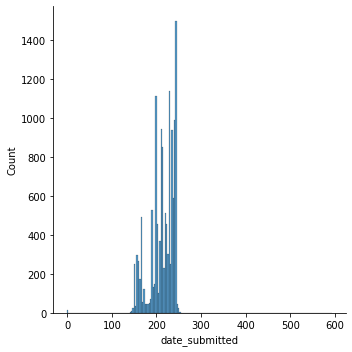

In [111]:
#Построим график:
sns.displot(data = df_mean_pass, x = df_mean_pass.date_submitted)

Из графика видны аномальные значения сдачи экзаменов, больше сроков семестра.  
Их мало, но они есть (например, есть значения выше календарного года). Как видно из таблицы df_courses (представлена выше) максимальный срок курса - 269 дней. Отберем date_submitted > 269.  Проверим:

In [112]:
df_mean_pass.query('date_submitted>269')

,code_module,code_presentation,id_student,date_submitted,final_score,final_weight
10131,CCC,2014J,555498,285.0,58.00,100.0
17432,DDD,2014J,2341830,279.0,49.00,100.0
21282,FFF,2013B,547884,594.0,61.00,100.0
24904,FFF,2014B,628846,487.0,88.75,100.0


Примем допущение, что студентам с id 555498 и 2341830 дали возможность закрыть экзамен, несмотря на незначительные нарушение дедлайна. В id студентов 628846 и 547884 макс. date_submitted равен 487 и 594 дням. Вес этих предметов равен нулю.
Сделаем замену данных, заменив макс. date_submitted на макс. значение date_submitted по предмету с весом больше нуля

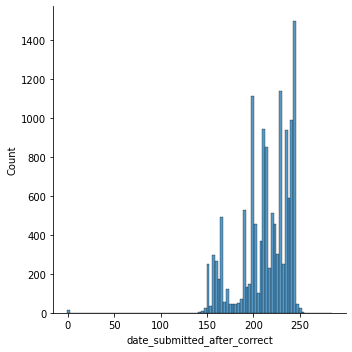

In [113]:
df_mean_pass_after_correct = df_mean_pass['date_submitted'].replace([487,594], [169,186])
df_mean_pass_after_correct = df_mean_pass.assign(date_submitted_after_correct=df_mean_pass_after_correct)
sns.displot(data = df_mean_pass_after_correct, x = df_mean_pass_after_correct.date_submitted_after_correct)

Из графика видно, что остались значения date_submitted == -1.
Таких студентов 13 (в таблице ниже)

In [114]:
df_mean_pass_after_correct.query('date_submitted_after_correct < 100')

,code_module,code_presentation,id_student,date_submitted,final_score,final_weight,date_submitted_after_correct
605,AAA,2014J,603861,-1.0,64.00,100.0,-1.0
653,AAA,2014J,1970390,-1.0,83.80,100.0,-1.0
2993,BBB,2013J,530112,-1.0,72.32,100.0,-1.0
4245,BBB,2013J,2061889,-1.0,72.51,100.0,-1.0
4676,BBB,2014B,506650,-1.0,64.22,100.0,-1.0
19454,EEE,2014J,610287,-1.0,76.88,100.0,-1.0
19469,EEE,2014J,616407,-1.0,90.96,100.0,-1.0
19498,EEE,2014J,628054,-1.0,69.16,100.0,-1.0
22132,FFF,2013J,405314,-1.0,83.25,100.0,-1.0
22308,FFF,2013J,508059,-1.0,62.50,100.0,-1.0


Всем этим студентам проставлялся перезачет по одному и тому же курсу с прошлых курсов. Отфильтруем эти значения

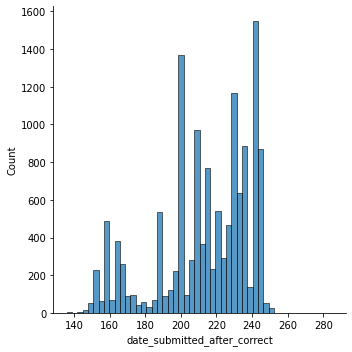

In [115]:
df_mean_pass_after_correct = df_mean_pass_after_correct.query('date_submitted_after_correct>-1')
sns.displot(data = df_mean_pass_after_correct, x = df_mean_pass_after_correct.date_submitted_after_correct)

Определим среднее время сдачи по курсам:

In [116]:
df_mean_pass_after_correct.groupby(['code_module'], as_index=False).agg({'date_submitted_after_correct':'mean'}).round(0)\
.sort_values('date_submitted_after_correct')

,code_module,date_submitted_after_correct
4,EEE,160.0
1,BBB,201.0
0,AAA,215.0
5,FFF,215.0
6,GGG,219.0
3,DDD,238.0
2,CCC,239.0


Определим среднее время сдачи курсов с разбивкой по семестрам:

In [117]:
df_mean_pass = df_mean_pass_after_correct.groupby(['code_module', 'code_presentation'], as_index=False).agg({'date_submitted_after_correct':'mean'}).round(0)\
.sort_values('date_submitted_after_correct')
df_mean_pass_after_correct

,code_module,code_presentation,id_student,date_submitted,final_score,final_weight,date_submitted_after_correct
0,AAA,2013J,11391,212.0,82.400000,100.0,212.0
1,AAA,2013J,28400,212.0,65.400000,100.0,212.0
3,AAA,2013J,31604,213.0,76.300000,100.0,213.0
5,AAA,2013J,38053,215.0,66.900000,100.0,215.0
6,AAA,2013J,45462,216.0,67.800000,100.0,216.0
...,...,...,...,...,...,...,...
29906,GGG,2014J,2533195,212.0,68.400000,100.0,212.0
29907,GGG,2014J,2606765,226.0,71.733333,100.0,226.0
29909,GGG,2014J,2620947,222.0,84.800000,100.0,222.0
29911,GGG,2014J,2645731,216.0,83.306667,100.0,216.0


***Можно сделать вывод, что по курсам с экзаменом (assessment_type = Exam) средний срок сдачи выше, нежели по остальным курсам. Происходит это из-за графика семестра - экзамен всегда позже последнего промежуточного предмета (CMA и TMA).  
Курс с самым низким средним значением сдачи - ЕЕЕ***

# 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3).

Данные о регистрациях студентов хранятся в таблице df_studentRegistration. 
Подсчитаем общее количество регистраций на курс за все время.

In [118]:
df_studentRegistration.groupby('code_module', as_index = False).agg({'id_student': 'nunique'})\
.rename(columns={'id_student':'count_registration'}).sort_values('count_registration', ascending = False)

,code_module,count_registration
1,BBB,7692
5,FFF,7397
3,DDD,5848
2,CCC,4251
4,EEE,2859
6,GGG,2525
0,AAA,712


Данные об отмене регистрации с курса хранятся в таблице df_studentRegistration. 
Подсчитаем общее количество отмен регистраций на курсы за все время.


In [119]:
df_studentRegistration.query('date_unregistration != "NaN"')\
.groupby('code_module', as_index = False).agg({'id_student': 'nunique'})\
.rename(columns={'id_student':'count_unregistration'}).sort_values('count_unregistration', ascending = False)

,code_module,count_unregistration
1,BBB,2314
5,FFF,2249
3,DDD,2065
2,CCC,1858
4,EEE,693
6,GGG,287
0,AAA,116


***Топ-3 по количеству регистраций на курс:***  
  1. BBB  
  2. FFF 
  3. DDD

***Топ-3 по количеству отмен регистраций на курс:***  
  1. FFF  
  2. BBB  
  3. DDD

Дополнительно можно сделать вывод, что чем больше зафиксировано регистраций на курс, тем больше будет отмен регистраций на этот курс

# 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов. 

Посмотрим, сколько в среднем нужно студентам для завершения курса и сколько длится каждый курс:

In [120]:
df_mean_pass.merge(df_count_students, on = ['code_module', 'code_presentation'])\
.drop(columns={'number_pass_students', 'count_students'})\
.merge(df_courses, on = ['code_module', 'code_presentation'])

,code_module,code_presentation,date_submitted_after_correct,completeness,module_presentation_length
0,EEE,2014B,152.0,52.0,241
1,EEE,2013J,159.0,59.0,268
2,EEE,2014J,166.0,59.0,269
3,BBB,2013B,189.0,30.0,240
4,BBB,2014B,200.0,32.0,234
5,BBB,2014J,200.0,57.0,262
6,FFF,2013B,205.0,50.0,240
7,FFF,2014B,209.0,44.0,241
8,BBB,2013J,210.0,36.0,268
9,AAA,2013J,215.0,73.0,268


Длительность каждого курса и времени сдачи меньше календарного года.
Поскольку в явном виде не задана четкая дата начала каждого семестра (code_presentation), будем считать, что все курсы попадают в промежуток с начала 2013 года по конец 2014 (т.е. курсы могут идти параллельно, напр. курс BBB 2013B и 2013J).  
Посчитаем среднее время сдачи курса и его завершаемости в каждом семестре:

In [121]:
df_mean_pass.merge(df_count_students, on = ['code_module','code_presentation'])\
.drop(columns={'number_pass_students', 'count_students'}).groupby('code_presentation', as_index = False)\
.agg({'date_submitted_after_correct':'mean', 'completeness':'mean'}).round()

,code_presentation,date_submitted_after_correct,completeness
0,2013B,208.0,40.0
1,2013J,210.0,51.0
2,2014B,207.0,42.0
3,2014J,216.0,52.0


Однозначно нельзя сделать вывод, какой семестр обладает двумя свойствами одновременно: низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  
Самая низкая завершаемость курсов (completeness) в 2013B.  
Самая высокая завершаемость курсов (completeness) в 2014J.  
Семестр с самым долгим средним сроком сдачи - 2014J; с самым низким - 2014B

# 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.

***R - среднее время сдачи одного экзамена.***  

Проведем фильтрацию тех, кто успешно сдал курс

In [122]:
df_mean_submitt = df_mean_pass_after_correct.query('final_weight > 99.999 & final_weight >=40 ')\
.groupby('id_student', as_index = False).agg({'date_submitted_after_correct':'mean'})
df_mean_submitt

,id_student,date_submitted_after_correct
0,6516,210.0
1,11391,212.0
2,23698,243.0
3,23798,210.0
4,24213,236.0
...,...,...
12843,2698125,227.0
12844,2698251,234.0
12845,2698257,215.0
12846,2698577,201.0


***F - завершаемость курсов у всех студентов***

Найдем все id студентов, которые делали попытку сдать экзамен или его эквивалент, после чего соединим результаты с id студентов, успешно завершивших курс:

In [123]:
df_count_attemps_pass = df.groupby('id_student', as_index = False).agg({'final_weight':'count'})\
.rename(columns={'final_weight':'count_attemps_pass'})
df_count_passed.groupby('id_student', as_index=False).agg({'count_passed':'count'})
df_completeness = df_count_attemps_pass.merge(df_count_passed.groupby('id_student', as_index=False).agg({'count_passed':'count'})\
                                              , on='id_student', how = 'outer')
#Делаем замену NaN на нули
df_completeness.count_passed = df_completeness.count_passed.fillna(0) 

Считаем завершаемость (completeness) как отношение кол-ва успешно сданных курсов / кол-во всех попыток сдать курс

In [124]:
df_completeness['completeness'] = (df_completeness.count_passed/df_completeness.count_attemps_pass*100).round()
df_completeness

,id_student,count_attemps_pass,count_passed,completeness
0,6516,1,1.0,100.0
1,8462,2,0.0,0.0
2,11391,1,1.0,100.0
3,23629,1,0.0,0.0
4,23698,1,1.0,100.0
...,...,...,...,...
26735,2698591,1,0.0,0.0
26736,2702660,1,0.0,0.0
26737,2707979,1,0.0,0.0
26738,2710343,2,0.0,0.0


***M - среднее количество баллов, получаемое за экзамен***  
Для анализа отберем все оценки, включая у тех id_student, которые не набрали минимальный проходной балл либо по промежуточным испытаниям, либо по экзамену

In [125]:
#id студентов по курсам ААА, BBB, EEE, FFF, включая несдавших
df_final_score_without_exam_all = df_all.query('code_module != "GGG" & code_module != "CCC" & code_module != "DDD"')\
                 .groupby(['code_module', 'code_presentation','id_student'], as_index = False)\
                 .agg({'score_weight':'sum', 'weight':'sum'}).rename(columns={'score_weight':'final_score', 'weight':'final_weight'})

#id студентов по курсу GGG, включая несдавших
df_GGG_all = df_GGG.groupby(['code_module', 'code_presentation','id_student'], as_index = False)\
                 .agg({'score_weight':'sum', 'new_weight':'sum'}).rename(columns={'score_weight':'final_score', 'new_weight':'final_weight'})

#id студентов по курсу CCC и DDD, включая несдавших
df_pass_exam_id

#Сведем все данные в одну таблицу

df_mean_score = pd.concat([df_final_score_without_exam_all, df_GGG_all, df_pass_exam_id])
df_mean_score

,code_module,code_presentation,id_student,final_score,final_weight
0,AAA,2013J,11391,82.4,100.0
1,AAA,2013J,28400,65.4,100.0
2,AAA,2013J,30268,0.0,0.0
3,AAA,2013J,31604,76.3,100.0
4,AAA,2013J,32885,55.0,100.0
...,...,...,...,...,...
95941,DDD,2014J,653319,64.0,100.0
95965,DDD,2014J,650232,49.0,100.0
95976,DDD,2014J,485421,42.0,100.0
95980,DDD,2014J,508615,27.0,100.0


Рассчитаем средний балл, полученный студентом по всем курсам (включая по тем, которые не были сданы)

In [126]:
df_mean_score = df_mean_score\
.groupby('id_student', as_index = False).agg({'final_score':'mean'})
df_mean_score

,id_student,final_score
0,6516,63.50
1,11391,82.40
2,23629,16.69
3,23698,80.00
4,23798,89.24
...,...,...
23583,2698535,53.44
23584,2698577,55.80
23585,2698588,92.40
23586,2698591,0.00


Соединяем таблицы:  
*R* - среднее время сдачи одного экзамена;  
*F* - завершаемость курсов у всех студентов;  
*M* - среднее количество баллов, получаемое по курсу

In [127]:
df_rfm = df_mean_submitt.merge(df_completeness, on = 'id_student', how = 'outer')\
.merge(df_mean_score, on = 'id_student', how = 'outer')\
.drop(columns=['count_attemps_pass', 'count_passed'])\
.rename(columns={'date_submitted_after_correct':'recency', 'completeness':'frequency', 'final_score':'monetary'})

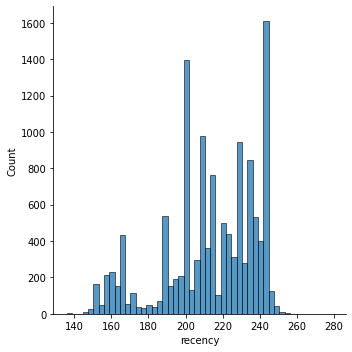

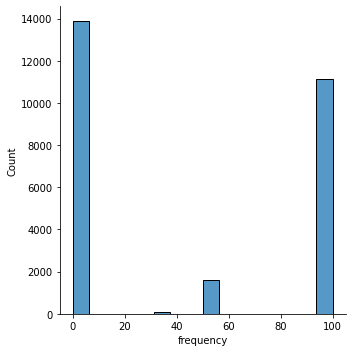

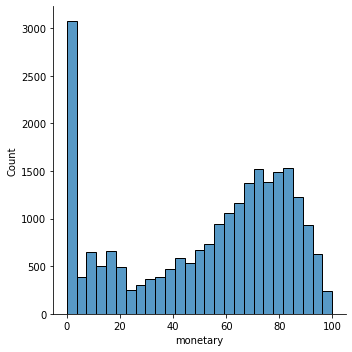

In [128]:
#Построим графики:
sns.displot(data = df_rfm, x = df_rfm.recency)
sns.displot(data = df_rfm, x = df_rfm.frequency)
sns.displot(data = df_rfm, x = df_rfm.monetary)

### Назначим диапазон значений для анализа RFM:
Для R проставим квантили c шагом 0,2 (5 диапазонов), поскольку сложно оценить эти диапазоны самостоятельно. Чем выше ранг, тем ниже средний срок сдачи.  
Ранг 5 - если средний срок сдачи курса у студента в дипазоне от 0 до 0,2; 1 - если в диапазон 0,8 - 1.  

Для F назначим диапазоны с шагом 20% (5 диапазонов). Чем выше ранг, тем выше завершаемость курсов.  
Ранг 5 - если студент имеет завершаемость курсов выше 80% (из анализа исходных данных в этот диапазон входят студенты только со 100% завершаемостью), 1 - если завершаемость ниже 20% (из анализа исходных данных в этот диапазон входят студенты со 0% завершаемостью);  

Для M назначим диапазоны как аналог 5-балльной шкалы: ниже 40 баллов - оценка 2; от 40 до 65 - 3, от 65 до 85 - 4 и выше 85 - 5   

Для всех случаев предусмотрено, если в анализе попадутся значения NaN. В этом случае проставляется низшая возможная оценка - 1.

In [129]:
quintiles_r = df_rfm[['recency']].quantile([.2, .4, .6, .8, 1]).to_dict()


def r_score(x):
    if x <= quintiles_r['recency'][.2]:
        return 5
    elif x <= quintiles_r['recency'][.4]:
        return 4
    elif x <= quintiles_r['recency'][.6]:
        return 3
    elif x <= quintiles_r['recency'][.8]:
        return 2
    elif x <= quintiles_r['recency'][1]:
        return 1
    else:
        return 1

def f_score(x):
    if x <= 20:
        return 1
    elif x <= 40:
        return 2
    elif x <= 60:
        return 3
    elif x <= 80:
        return 4
    elif x <= 100:
        return 5
    else:
        return 1

def m_score(x):
    if x <= 20:
        return 1
    elif x < 40:
        return 2
    elif x <= 65:
        return 3
    elif x <= 85:
        return 4
    elif x <= 100:
        return 5
    else:
        return 1    

Вставим значения r, f и m в таблицу rfm

In [130]:
df_rfm['r'] = df_rfm['recency'].apply(lambda x: r_score(x))
df_rfm['f'] = df_rfm['frequency'].apply(lambda x: f_score(x))
df_rfm['m'] = df_rfm['monetary'].apply(lambda x: m_score(x))
df_rfm['rfm_score'] = df_rfm['r'].map(str) + df_rfm['f'].map(str) + df_rfm['m'].map(str)
df_rfm

,id_student,recency,frequency,monetary,r,f,m,rfm_score
0,6516,210.0,100.0,63.50,4,5,3,453
1,11391,212.0,100.0,82.40,3,5,4,354
2,23698,243.0,100.0,80.00,1,5,4,154
3,23798,210.0,100.0,89.24,4,5,5,455
4,24213,236.0,100.0,58.00,2,5,3,253
...,...,...,...,...,...,...,...,...
26735,2698591,NaN,0.0,0.00,1,1,1,111
26736,2702660,NaN,0.0,0.00,1,1,1,111
26737,2707979,NaN,0.0,NaN,1,1,1,111
26738,2710343,NaN,0.0,NaN,1,1,1,111


Считаем сегменты.

*Из анализа предыдущих пунктов: у студентов, сдающих экзамен (assessment_type == Exam) средний срок сдачи выше, чем у остальных студентов. Причина этого - экзамен всегда стоит позже, нежели последний промежуточный предмет (TMA или CMA). Поэтому искусственно студенты групп CCC и DDD попадут по R в группу 1 (самый низкий показатель), хотя сами студенты в этом не виноваты - так построен график семестра и изначально была выбрана методика расчета эквивалента экзамена для предметов, где его нет в данных. В то же время студенты курсов ЕЕЕ попадут в группу 5, поскольку последний промежуточный предмет поставлен значительно раньше других предметов, что, в свою очередь, никак не говорит о способностях этих студентов закрывать курсы раньше других - так построен график семестра.*

Ввиду этого, рассчитаем сегменты по значениям F и M, где:  
*hibernating* - студенты с низкой завершаемостью курсов (ниже 40%) и имеющие среднюю оценку за все курсы ниже 40;  
*at risk* - студенты со средней и выше среднего завершаемостью курсов (выше 40%) и имеющие среднюю оценку за все курсы выше 40;  
*about to sleep* - студенты с низкой завершаемостью курсов (ниже 40%) и имеющие среднюю оценку за все курсы от 40 до 65;  
*need attention* - находятся посередине как по завершаемости курсов, так и по успеваемости;  
*promising* - средняя оценка выше 65 баллов и ниже 85, но завершаемость курсов ниже среднего (ниже 40%);  
*loyal students* - получили среднюю оценку выше средних значений по 100-бальной шкале: от 65 до 100 с завершаемостью от 40 до 60% и от 40 до 100 с завершаемостью от 60 до 80%);  
*potential champions* - завершаемость курсов выше 80%, но средняя оценка от 40 до 85;  
*champions* - завершаемость курсов выше 80%, и средняя оценка выше 85. 

In [131]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[3-5][1-2]': 'at risk',
    r'[1-2]3': 'about to sleep',
    r'33': 'need attention',
    r'[1-2][4-5]': 'promising',
    r'4[3-5]': 'loyal students',
    r'3[4-5]': 'loyal students',
    r'5[3-4]': 'potential champions',
    r'55': 'champions'
}

df_rfm['segment'] = df_rfm['f'].map(str) + df_rfm['m'].map(str)
df_rfm['segment'] = df_rfm['segment'].replace(segt_map, regex=True)
df_rfm

,id_student,recency,frequency,monetary,r,f,m,rfm_score,segment
0,6516,210.0,100.0,63.50,4,5,3,453,potential champions
1,11391,212.0,100.0,82.40,3,5,4,354,potential champions
2,23698,243.0,100.0,80.00,1,5,4,154,potential champions
3,23798,210.0,100.0,89.24,4,5,5,455,champions
4,24213,236.0,100.0,58.00,2,5,3,253,potential champions
...,...,...,...,...,...,...,...,...,...
26735,2698591,NaN,0.0,0.00,1,1,1,111,hibernating
26736,2702660,NaN,0.0,0.00,1,1,1,111,hibernating
26737,2707979,NaN,0.0,NaN,1,1,1,111,hibernating
26738,2710343,NaN,0.0,NaN,1,1,1,111,hibernating


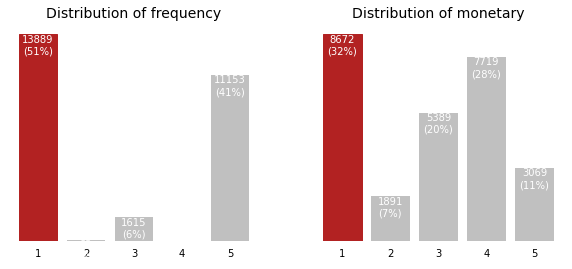

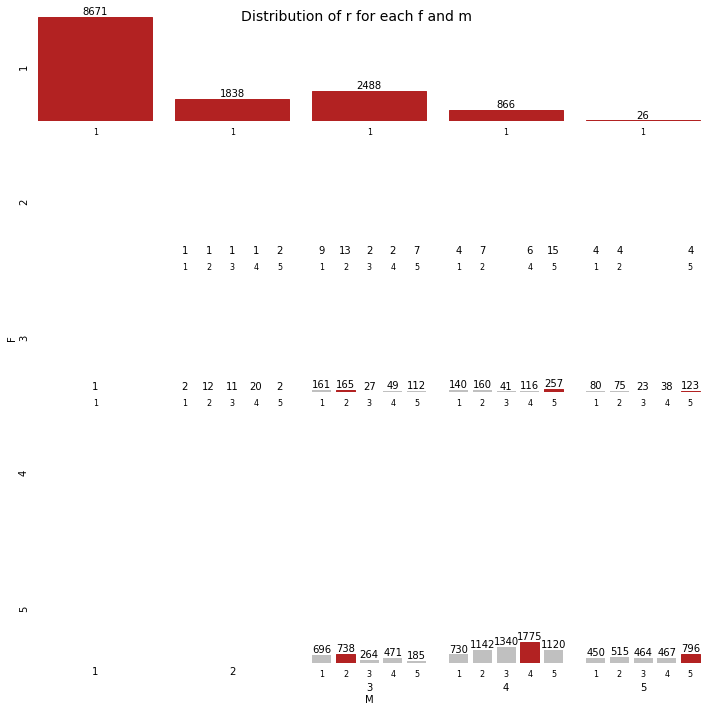

In [132]:
# Построим график распределения студентов по F и M

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['f', 'm']):
    parameters = {'f':'frequency', 'm':'monetary'}
    y = df_rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()


# Построим график распредения R по FM оценке
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = df_rfm[(df_rfm['f'] == r) & (df_rfm['m'] == f)]['r'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nM'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('F\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of r for each f and m',
             fontsize=14)
plt.tight_layout()
plt.show()

По распределению завершаемости можно поделить всех студентов на две большие категории: кто не сдал ни одного курса во всех попытках и тех, кто сдал все. Также есть небольшая группа тех студентов, кто сдал только часть курсов.   
Распределение по средним оценкам: большинство студентов имеет ранг 1 (что очевидно из распределения завершаемости курсов). Если не брать в расчет ранг 1, то наиболее частым встречаемым рангом является 4 (что соответствует средней оценке студента от 65 до 85 баллов).  
Если включить в анализ средний срок сдачи курсов, то с рангом 4 и 5 заканчивают курсы студенты с высокой завершаемостью и успеваемостью. Также есть ряд студентов с низкой завершаемостью курсов (f=1), но средним баллом выше 40 (m>=3). Поскольку в этот анализ были взяты средние оценки всех студентов без исключения, это может говорить, что эти студенты не сдали какой-то промежуточный предмет, и суммарный вес предметов ниже 100, что не позволяет зачесть курс (r=1 и f=1).

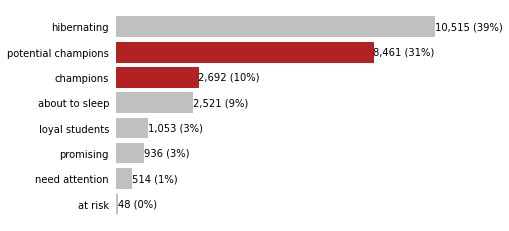

In [133]:
# количество студентов в каждом сегменте
segments_counts = df_rfm['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'potential champions']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Большинство студентов попало в группу *hibernating* - 39%. Но суммарно 43% попало в категорию *potential champions* и *champions*.  Также почти 9% составляют студенты с завершаемостью курсов ниже 40% и средней оценкой от 40 до 65. Остальные группы незначительны по количеству попавших в них студентов.